In [1]:
import pandas as pd
df = pd.read_csv("nypd.csv")

C:\Users\Dan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
inattetion =  df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'] == "Driver Inattention/Distraction"]
timespan = ( pd.to_datetime(inattetion['DATE'])  >= '2016-1-1') & ( pd.to_datetime(inattetion['DATE'])  < '2017-1-1')
inattention2016 = inattetion.loc[timespan]
days = pd.date_range(start=pd.datetime(2016, 1, 1), periods=366, freq='D')

x=[]
y=[]

    
for i in range(0,366):
    for j in range(8,20):
        x.append(j)

for i in range(0,366):
    k = '{:%m/%d/%Y}'.format(days[i])
    
    tmp  = inattention2016.loc[inattention2016['DATE']==k]
    for j in range(8,20):
        if j<9:
            hours  = (tmp['TIME']>= '0%i:00'%j) & (tmp['TIME']<='0%i:00'%(j+1))
        else:
            if j==9:
                hours  = (tmp['TIME']>= '0%i:00'%j) & (tmp['TIME']<='%i:00'%(j+1))
            else:
                hours  = (tmp['TIME']>= '%i:00'%j) & (tmp['TIME']<='%i:00'%(j+1))
        tmpH = tmp.loc[hours]
        y.append(len(tmpH))

In [114]:
data = []
for i in range(0,12):
    data.append([])

idx = 0 
for j in y:
    data[idx].append(j)
    idx = (idx+1) % 12

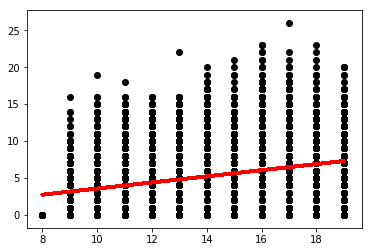

In [117]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib inline
line = plt.figure()
xarray = np.asarray(x)
xarray = xarray.reshape(4392,1)
lin = linear_model.LinearRegression()
lin.fit(xarray,y)
alpha = lin.intercept_
beta = lin.coef_[0]

for i in range(0,12):
    a = [i+8 for j in range(0,366)]
    b = data[i]
    plt.scatter(a, b, color="black")

plt.plot(xarray, lin.predict(xarray), color='red'
         ,linewidth=3)
plt.show()

In [118]:
timespan = ( pd.to_datetime(inattetion['DATE'])  >= '2016-1-1') & ( pd.to_datetime(inattetion['DATE'])  < '2017-1-1')
inattention2016 = inattetion.loc[timespan]
mean = []
for i in range(8,20):
    if i<9:
        hours  = (inattention2016['TIME']>= '0%i:00'%i) & (inattention2016['TIME']<='0%i:00'%(i+1))
    else:
        if i==9:
            hours  = (inattention2016['TIME']>= '0%i:00'%i) & (inattention2016['TIME']<='%i:00'%(i+1))
        else:
            hours  = (inattention2016['TIME']>= '%i:00'%i) & (inattention2016['TIME']<='%i:00'%(i+1))
    everyH = inattention2016.loc[hours]
    mean.append(len(everyH)/366)
print "Average inattention in each hours : ", mean

Average inattention in each hours :  [0.0, 3.079234972677596, 4.423497267759563, 4.778688524590164, 5.23224043715847, 5.366120218579235, 6.251366120218579, 5.8224043715847, 6.96448087431694, 6.554644808743169, 5.797814207650274, 5.959016393442623]


In [119]:
xi2 = []
for i in range(0,366):
    k = '{:%m/%d/%Y}'.format(days[i])
    
    tmpDays  = inattention2016.loc[inattention2016['DATE']==k]
    for j in range(8,20):
        if j<9:
            hours  = (tmpDays['TIME']>= '0%i:00'%j) & (tmpDays['TIME']<='0%i:00'%(j+1))
        else:
            if j==9:
                hours  = (tmpDays['TIME']>= '0%i:00'%j) & (tmpDays['TIME']<='%i:00'%(j+1))
            else:
                hours  = (tmpDays['TIME']>= '%i:00'%j) & (tmpDays['TIME']<='%i:00'%(j+1))
        tmpHours = tmpDays.loc[hours]
        xi2.append(len(tmpHours) - mean[j-8])

In [120]:
xi1 = np.array(x).reshape(4392,1)
xi2 = np.array(xi2).reshape(4392,1)
tmp = np.column_stack((xi1,xi2))
regrMultiple = linear_model.LinearRegression()
regrMultiple.fit(tmp,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

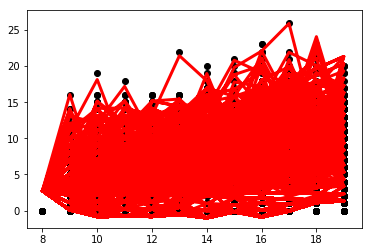

In [121]:
%matplotlib inline
line = plt.figure()
for i in range(0,12):
    a = [i+8 for j in range(0,366)]
    b = data[i]
    plt.scatter(a, b, color="black")
plt.plot(xarray, regrMultiple.predict(tmp), color='red',
        linewidth=3)
plt.show()

In [8]:
car =  df.loc[df['VEHICLE TYPE CODE 1'] == "PASSENGER VEHICLE"]
car.dropna(subset=['LATITUDE'], inplace=True)
car.dropna(subset=['LONGITUDE'], inplace=True)
car

/Users/Enchanter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Enchanter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2,05/02/2017,0:00,BROOKLYN,11212,40.660050,-73.917430,"(40.66005, -73.91743)",LENOX ROAD,EAST 98 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,3662433,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
3,05/02/2017,0:00,BROOKLYN,11214,40.593884,-73.990200,"(40.593884, -73.9902)",BAY 40 STREET,BATH AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3662384,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
4,05/02/2017,0:00,MANHATTAN,10001,40.749100,-73.992010,"(40.7491, -73.99201)",WEST 31 STREET,7 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3661959,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
11,05/02/2017,0:00,NaN,NaN,40.825935,-73.859130,"(40.825935, -73.85913)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3661538,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
13,05/02/2017,0:00,QUEENS,11432,40.705826,-73.793970,"(40.705826, -73.79397)",MERRICK BOULEVARD,JAMAICA AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3661695,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
14,05/02/2017,0:10,BROOKLYN,11206,40.696354,-73.940710,"(40.696354, -73.94071)",MARCUS GARVEY BOULEVARD,MYRTLE AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3662412,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
17,05/02/2017,0:30,QUEENS,11102,40.769787,-73.918420,"(40.769787, -73.91842)",NaN,NaN,25-38 31 STREET,...,Driver Inattention/Distraction,NaN,NaN,NaN,3661645,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
18,05/02/2017,0:35,BROOKLYN,11228,40.625240,-74.009470,"(40.62524, -74.00947)",71 STREET,11 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3661669,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
19,05/02/2017,0:37,NaN,NaN,40.872310,-73.871956,"(40.87231, -73.871956)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3662012,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
21,05/02/2017,0:50,MANHATTAN,10016,40.744064,-73.987755,"(40.744064, -73.987755)",EAST 27 STREET,5 AVENUE,NaN,...,NaN,NaN,NaN,NaN,3661503,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [18]:
X = []
Y = []
for i in car['LONGITUDE']:
    X.append(i)
for i in car['LATITUDE']:
    Y.append(i)
    

import numpy 
points = numpy.zeros(shape=(len(Y),2))
for i in range(0,len(Y)):
    if Y[i] <41 and X[i]<0: 
        points[i][0] = X[i]
        points[i][1] = Y[i]
    else:
        points[i][0] = -74.251609
        points[i][1]= 40.499186

In [2]:
import numpy as np
import random
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

In [ ]:
ck2 = find_centers(points,2)
ck3 = find_centers(points,3)
ck4 = find_centers(points,4)
ck5 = find_centers(points,5)
ck6 = find_centers(points,6)

In [25]:
f =  open('ck2.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1


# all the points besides the clusters   
for i in range(0, len(ck2)):
    for j in ck2[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
#the clusters points
for i in ck2[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1 
f.close()

NameError: name 'ck2' is not defined

In [ ]:
f =  open('ck3.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1


    
for i in range(0, len(ck3)):
    for j in ck3[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
for i in ck3[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1   
f.close()

In [ ]:
k = ck4

f =  open('ck4.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1
for i in k[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1 

    
for i in range(0, len(k[1])):
    for j in k[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
    
f.close()

In [ ]:
k = ck5

f =  open('ck5.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1
for i in k[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1 

    
for i in range(0, len(k[1])):
    for j in k[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
    
f.close()

In [ ]:
k = ck6

f =  open('ck6.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1
for i in k[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1 

    
for i in range(0, len(k[1])):
    for j in k[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
    
f.close()

In [3]:
bike =  df.loc[df['VEHICLE TYPE CODE 1'] == "BICYCLE"]
bike.dropna(subset=['LATITUDE'], inplace=True)
bike.dropna(subset=['LONGITUDE'], inplace=True)
bike

C:\Users\Dan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Dan\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
190,04/25/2017,14:50,BRONX,10453,40.850494,-73.915460,"(40.850494, -73.91546)",UNIVERSITY AVENUE,WEST TREMONT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3657708,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
200,04/25/2017,15:05,MANHATTAN,10024,40.788418,-73.970770,"(40.788418, -73.97077)",COLUMBUS AVENUE,WEST 89 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3657619,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
409,04/25/2017,20:25,BROOKLYN,11211,40.711422,-73.959540,"(40.711422, -73.95954)",ROEBLING STREET,SOUTH 3 STREET,NaN,...,NaN,NaN,NaN,NaN,3657466,BICYCLE,NaN,NaN,NaN,NaN
699,04/24/2017,12:15,MANHATTAN,10001,40.751446,-74.001434,"(40.751446, -74.001434)",WEST 29 STREET,10 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3658166,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
703,04/24/2017,12:25,QUEENS,11370,40.765010,-73.887100,"(40.76501, -73.8871)",ASTORIA BOULEVARD,82 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3657321,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
746,04/24/2017,14:00,MANHATTAN,10016,40.746475,-73.983900,"(40.746475, -73.9839)",EAST 32 STREET,MADISON AVENUE,NaN,...,Other Vehicular,NaN,NaN,NaN,3658396,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
829,04/24/2017,16:10,MANHATTAN,10017,40.755190,-73.971220,"(40.75519, -73.97122)",3 AVENUE,EAST 49 STREET,NaN,...,NaN,NaN,NaN,NaN,3656799,BICYCLE,NaN,NaN,NaN,NaN
876,04/24/2017,17:28,NaN,NaN,40.686930,-73.950890,"(40.68693, -73.95089)",NOSTRAND AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3656870,BICYCLE,NaN,NaN,NaN,NaN
955,04/24/2017,20:06,MANHATTAN,10155,40.761395,-73.968190,"(40.761395, -73.96819)",NaN,NaN,150 EAST 58 STREET,...,NaN,NaN,NaN,NaN,3656836,BICYCLE,NaN,NaN,NaN,NaN
1227,04/23/2017,13:00,MANHATTAN,10002,40.714462,-73.985350,"(40.714462, -73.98535)",MONTGOMERY STREET,EAST BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,3656378,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [22]:
X = []
Y = []
for i in bike['LONGITUDE']:
    X.append(i)
for i in bike['LATITUDE']:
    Y.append(i)
    

import numpy 
points = numpy.zeros(shape=(len(Y),2))
for i in range(0,len(Y)):
     
        points[i][0] = X[i]
        points[i][1] = Y[i]
    

In [ ]:
bk2 = find_centers(points,2)
bk3 = find_centers(points,3)
bk4 = find_centers(points,4)
bk5 = find_centers(points,5)
bk6 = find_centers(points,6)

In [ ]:
f =  open('bk2.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1


# all the points besides the clusters   
for i in range(0, len(bk2)):
    for j in bk2[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
#the clusters points
for i in bk2[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1 
f.close()

In [ ]:
f =  open('bk3.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1


    
for i in range(0, len(bk3)):
    for j in bk3[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
for i in bk3[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1   
f.close()

In [ ]:
k = bk4

f =  open('bk4.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1
for i in k[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1 

    
for i in range(0, len(k[1])):
    for j in k[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
    
f.close()

In [ ]:
k = bk5

f =  open('bk5.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1
for i in k[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1 

    
for i in range(0, len(k[1])):
    for j in k[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
    
f.close()

In [ ]:
k = bk6

f =  open('bk6.csv', 'w')
f.write("lat,lon,type,\n")
counter = 1
for i in k[0]:
    s= ""
    s = s + str(i[0]) +  ','+  str(i[1]) + "," + str(counter*10) + '\n'
    f.write(s )
    counter=  counter +1 

    
for i in range(0, len(k[1])):
    for j in k[1][i]:
        s= ""
        s = s + str(j[0]) +  ','+  str(j[1]) + "," + str(i+1) + '\n'
        f.write(s)
    
f.close()